# Figure 8: Environmental correlations increase the range of fitness landscapes for which switching strategies are optimal

Goal: Show how optimality of switching depends on fitnesses of phenotypes in correlated environments

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['transitions.mplstyle'])
import matplotlib
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']
black = matplotlib.rcParams['text.color']

import sys
sys.path.append('lib/')
import plotting
import evolimmune

In [2]:
def s1(s0, aenv):
    s1 = s0*(1.0-aenv*(1.0-s0))/((1.0 - s0)*(1.0-aenv*(1.0+s0)))
    s1[s1 < 0] = np.nan
    return s1

/home/andreas/miniconda2/envs/transitions/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/home/andreas/miniconda2/envs/transitions/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


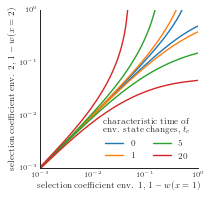

In [3]:
s0 = np.logspace(-3.0, 0.0, 100)
tauenvs = [0.0, 1.0, 5.0, 20.0]
fig, ax = plt.subplots(figsize=(3.0, 3.0), subplot_kw=dict(aspect='equal'))
for i, tauenv in enumerate(tauenvs):
    aenv = evolimmune.from_tau(tauenv)
    l, = ax.plot(s0, s1(s0, aenv), label='%g'%tauenv, c=colors[i])
    ax.plot(s1(s0, aenv), s0, c=l.get_color())
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.001, 1)
ax.set_ylim(0.001, 1)
ax.legend(title='characteristic time of \n env. state changes, $t_c$', loc='lower right', ncol=2)
ax.set_xlabel(r'selection coefficient env. 1, $1-w(x=1)$')
ax.set_ylabel(r'selection coefficient env. 2, $1-w(x=2)$')
plotting.despine(ax)
fig.tight_layout()
fig.savefig('svgs/corrswitching.svg')

**Environmental correlations increase the range of fitness landscapes for which switching strategies are optimal.**
        Region where switching is optimal (in between colored lines) as a function of environmental correlation time. Two state environment as in Fig. 4 with symmetric environmental frequencies, $p_2 = p_1 = 0.5$. Selection coefficient $1-w(x)$ quantifies how much the best adapted phenotype to environment $x$ outperforms the suboptimal phenotype for that environment.